PROBLEM 1

In [ ]:
import math

epsilon = 0.05 #error defined at most 0.05
delta = 0.05 #95% confidence b/c confidence is 1-delta
d_vc = 10

def sample_size(N):
  growth_function = (2 * N) ** d_vc #define the growth function
  #VC inequality formula for error in terms of delta
  return math.sqrt(8 / N * math.log(4 * growth_function / delta))


def main():
  N = 1
  while True:
    curr = sample_size(N)
    if curr <= epsilon: #if error at most 0.05 then break
      print(f'N = {N}') #print N that resulted in error of at most 0.05 at 95% confidence
      break
    N += 1

if __name__ == "__main__":
    main()

N = 452957


PROBLEM 2

PROBLEM 3

In [ ]:
def main():
  N = 5
  print(f"Results for N = {N}:")
  print(f"VC Bound [a]: {VC_bound(N)}")
  print(f"Rademacher Bound [b]: {Rademacher_bound(N)}")
  print(f"Parrondo Bound [c]: {Paraondo_Broek(N)}")
  print(f"Devroye Bound [d]: {Devroye(N)}")

if __name__ == "__main__":
    main()

Results for N = 5:
VC Bound [a]: 13.828161484991483
Rademacher Bound [b]: 2.7214987735721996
Parrondo Bound [c]: 4.901361981989992
Devroye Bound [d]: 16.936167644169846


PROBLEM 4

In [ ]:
import numpy as np

runs = 10000

def target_function(x):
  return np.sin(np.pi * x)

def hypothesis(a, x):
  return a * x

def slope(x1, y1, x2, y2):
  if x1 == x2:
    return 0
  return (y2 - y1) / (x2 - x1)

def main():
  slopes = []
  for _ in range(runs):
    x1, x2 = np.random.uniform(1, -1, 2)
    y1 = target_function(x1)
    y2 = target_function(x2)

    a = slope(x1, y1, x2, y2)
    slopes.append(a)

  res = np.mean(slopes)
  print(res)

if __name__ == "__main__":
    main()

0.7668278578900919


In [ ]:
import numpy as np

#define the target function
def f(x):
    return np.sin(np.pi * x)

#perform least squares linear regression to find the slope a
def compute_slope(x_train, y_train):
    X_train = np.vstack([x_train]).T
    a = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
    return a[0]


n_simulations = 10000 #simulate on 10000 runs
x_min, x_max = -1, 1

slope_sum = 0

# Perform the simulation
for _ in range(n_simulations):
    x_train = np.random.uniform(x_min, x_max, 2) #pick random 2 points

    y_train = f(x_train)

    slope = compute_slope(x_train, y_train) #find slope thru points

    slope_sum += slope

average_slope = slope_sum / n_simulations

print(f"Expected a: {average_slope:.2f}")

Expected a: 1.43


PROBLEM 5

In [ ]:
import numpy as np

#define target function
def f(x):
    return np.sin(np.pi * x)

def compute_bias(a):
    x_values = np.linspace(-1, 1, 10000) #pick 10000 points to evaluate bias

    g_x = a * x_values
    f_x = f(x_values)

    bias = np.mean((g_x - f_x) ** 2) #calculate avg bias

    return bias

slope = 1.42 #slope from prob 4
bias = compute_bias(slope)
print(f"Bias: {bias:.2f}")

Bias: 0.27


PROBLEM 6

In [ ]:
import numpy as np

def f(x):
    return np.sin(np.pi * x)

# Perform least squares linear regression to find the slope a
def compute_slope(x_train, y_train):
    X_train = np.vstack([x_train]).T
    a = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
    return a[0]

def simulate_variance(num_datasets, x_values, expected_slope):
    slopes = []

    for _ in range(num_datasets):
        #randomly select 2 points from uniform distribution in [-1, 1]
        x_train = np.random.uniform(-1, 1, 2)
        y_train = f(x_train)

        a = compute_slope(x_train, y_train)
        slopes.append(a)

    # Compute the variance
    variances = []
    for x in x_values:
        h_x_values = [a * x for a in slopes]
        expected_h_x = expected_slope * x
        variance_x = np.mean([(h_x - expected_h_x) ** 2 for h_x in h_x_values])
        variances.append(variance_x)

    return np.mean(variances)

# Parameters
num_datasets = 10000
x_values = np.linspace(-1, 1, 1000)  # Points to evaluate variance
expected_slope = 1.42

variance = simulate_variance(num_datasets, x_values, expected_slope)

print(f"Variance: {variance:.2f}")


Variance: 0.24


In [ ]:
from scipy.integrate import quad

expected_slope = 0.79 #from problem 4
num_hypotheses = 10000

def expected_hypothesis(x):
  return expected_slope * x

def target_function(x):
  return np.sin(np.pi * x)

def slope(x1, y1, x2, y2):
  if x1 == x2:
    return 0
  return (y2 - y1) / (x2 - x1)

def generate_hypothesis():
  x1, x2 = np.random.uniform(1, -1, 2)
  y1 = target_function(x1)
  y2 = target_function(x2)

  a = slope(x1, y1, x2, y2)

  return lambda x: a * x

def squared_diff(hypothesis, x):
  return (expected_hypothesis(x) - hypothesis(x)) ** 2

def main():
  squared_diffs = []
  for _ in range(num_hypotheses):
    hypothesis = generate_hypothesis()
    variance, _ = quad(lambda x: squared_diff(hypothesis, x), -1, 1)
    #print(variance)
    squared_diffs.append(variance)

  avg_variance = np.mean(squared_diffs)
  print(avg_variance)

if __name__ == "__main__":
    main()

1.5177988838460412


PROBLEM 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Target function
def target_function(x):
    return np.sin(np.pi * x)

# Generate the dataset
np.random.seed(42)
num_samples = 100
x_train = np.random.uniform(-1, 1, size=num_samples).reshape(-1, 1)
y_train = target_function(x_train)

# Function to calculate mean squared error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate bias and variance
def bias_variance_analysis(hypothesis_model, num_experiments=100, num_samples=10):
    # Generate test data
    x_test = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_test = target_function(x_test)

    predictions = np.zeros((num_experiments, len(x_test)))

    for i in range(num_experiments):
        x_train = np.random.uniform(-1, 1, size=num_samples).reshape(-1, 1)
        y_train = target_function(x_train)

        # Fit the model
        y_pred = hypothesis_model(x_train, y_train, x_test)
        predictions[i] = y_pred.flatten()

    avg_predictions = np.mean(predictions, axis=0)

    # Calculate bias
    bias = mse(y_test, avg_predictions)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=0))

    return bias, variance

# Hypothesis [a]: h(x) = b (constant model)
def constant_model(x_train, y_train, x_test):
    b = np.mean(y_train)
    return np.full(x_test.shape, b)

# Hypothesis [b]: h(x) = ax^3 (cubic model)
def cubic_model(x_train, y_train, x_test):
    poly = PolynomialFeatures(degree=3)
    X_poly_train = poly.fit_transform(x_train)
    X_poly_test = poly.transform(x_test)
    model = LinearRegression().fit(X_poly_train, y_train)
    return model.predict(X_poly_test)

# Hypothesis [c]: h(x) = ax + b (linear model)
def linear_model(x_train, y_train, x_test):
    model = LinearRegression().fit(x_train, y_train)
    return model.predict(x_test)

# Hypothesis [d]: h(x) = ax^2 (quadratic model without intercept)
def quadratic_model(x_train, y_train, x_test):
    poly = PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(x_train)
    X_poly_test = poly.transform(x_test)
    model = LinearRegression().fit(X_poly_train, y_train)
    return model.predict(X_poly_test)

# Hypothesis [e]: h(x) = ax^2 + b (quadratic model with intercept)
def quadratic_model_with_intercept(x_train, y_train, x_test):
    return quadratic_model(x_train, y_train, x_test)

# Perform bias and variance analysis for each model
models = {
    'Constant Model': constant_model,
    'Cubic Model': cubic_model,
    'Linear Model': linear_model,
    'Quadratic Model': quadratic_model,
    'Quadratic Model with Intercept': quadratic_model_with_intercept
}


for name, model in models.items():
    bias, variance = bias_variance_analysis(model)
    out_of_sample_error = bias + variance
    print(f'{name}: Bias = {bias:.2f}, Variance = {variance:.2f}, Out-of-Sample Error = {out_of_sample_error:.2f}')


Constant Model: Bias = 0.50, Variance = 0.04, Out-of-Sample Error = 0.54
Cubic Model: Bias = 0.99, Variance = 0.01, Out-of-Sample Error = 1.00
Linear Model: Bias = 0.82, Variance = 0.05, Out-of-Sample Error = 0.87
Quadratic Model: Bias = 1.04, Variance = 0.23, Out-of-Sample Error = 1.27
Quadratic Model with Intercept: Bias = 1.06, Variance = 0.30, Out-of-Sample Error = 1.36


Constant model: bias^2 = 0.5035, variance = 0.2344, MSE = 0.7379
Linear model: bias^2 = 0.2479, variance = 1.6231, MSE = 1.8710
Quadratic model: bias^2 = 0.2045, variance = 1.2750, MSE = 1.4794
Cubic model: bias^2 = 0.2237, variance = 0.8588, MSE = 1.0826


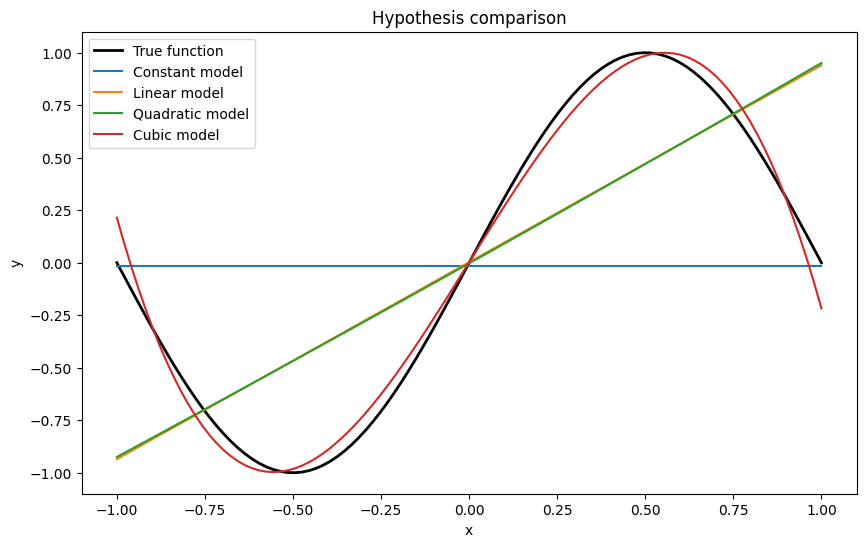

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# True function: f(x) = sin(pi * x)
def true_function(x):
    return np.sin(np.pi * x)

# Generate training data (N=2)
np.random.seed(42)
num_samples = 1000
X_train = np.random.uniform(-1, 1, size=(num_samples, 1))
y_train = true_function(X_train)

# Testing points for evaluating bias and variance
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_test = true_function(X_test)

# Function to fit models and compute predictions
def fit_and_predict(degree, X_train, y_train, X_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    return y_pred

# Different hypotheses
degrees = {
    'constant': 0,
    'linear': 1,
    'quadratic': 2,
    'cubic': 3,
}

# Dictionary to store bias^2, variance, and error for each hypothesis
results = {}

# Calculate predictions, bias, variance, and total MSE for each hypothesis
for name, degree in degrees.items():
    predictions = []
    for i in range(100):  # Run multiple experiments for variance estimation
        X_train_sample = np.random.uniform(-1, 1, size=(2, 1))
        y_train_sample = true_function(X_train_sample)
        y_pred = fit_and_predict(degree, X_train_sample, y_train_sample, X_test)
        predictions.append(y_pred)

    predictions = np.array(predictions)

    # Calculate bias^2: (average prediction - true value)^2
    avg_prediction = np.mean(predictions, axis=0)
    bias_sq = np.mean((avg_prediction - y_test) ** 2)

    # Calculate variance: average of (prediction - average prediction)^2
    variance = np.mean(np.var(predictions, axis=0))

    # Calculate total MSE (bias^2 + variance)
    mse = bias_sq + variance

    results[name] = {
        'bias^2': bias_sq,
        'variance': variance,
        'MSE': mse
    }

# Print results
for name, res in results.items():
    print(f"{name.capitalize()} model: bias^2 = {res['bias^2']:.4f}, variance = {res['variance']:.4f}, MSE = {res['MSE']:.4f}")

# Plot predictions of the different hypotheses against the true function
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label="True function", color='black', linewidth=2)

for name, degree in degrees.items():
    avg_prediction = fit_and_predict(degree, X_train, y_train, X_test)
    plt.plot(X_test, avg_prediction, label=f"{name.capitalize()} model")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hypothesis comparison")
plt.show()
